In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns



In [2]:
df = pd.read_csv('C:/Users/Dell/Desktop/deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
df.shape

(150460, 21)

In [9]:
#Indepth analysis of David warner

In [4]:
filt=df['batsman']=='DA Warner'
df_warner=df[filt]
df_warner.shape

(2902, 21)

In [5]:
df_warner.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
df_warner['dismissal_kind'].value_counts()

caught               62
bowled               21
run out               8
lbw                   4
stumped               4
caught and bowled     2
hit wicket            1
Name: dismissal_kind, dtype: int64

<AxesSubplot:ylabel='dismissal_kind'>

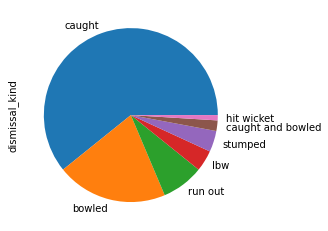

In [7]:
df_warner['dismissal_kind'].value_counts().plot.pie()

<AxesSubplot:>

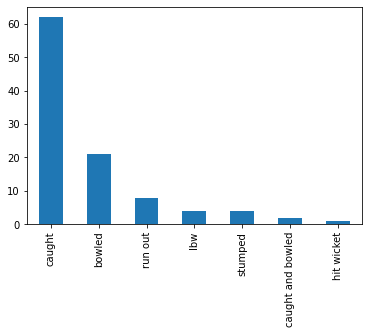

In [8]:
df_warner['dismissal_kind'].value_counts().plot.bar()

In [10]:
# calculate total no of sixes & four hit by David Warner

In [9]:
len(df_warner[df_warner['batsman_runs']==6])

160

In [11]:
len(df_warner[df_warner['batsman_runs']==4])

401

In [12]:
# calculate total run hit by david warner 

In [13]:
df_warner['total_runs'].sum()

4213

In [14]:
# Pass a function for calculating  total number of run scored by batsment in form of single & boundries

In [15]:
def count(df,runs):
    return len(df_warner[df_warner['batsman_runs']==runs])*runs

In [16]:
count(df_warner,1)

997

In [17]:
count(df_warner,2)

414

In [18]:
count(df_warner,3)

39

In [19]:
count(df_warner,4)

1604

In [20]:
count(df_warner,6)

960

In [21]:
#Plot a graph for representing  runs scored in form of singles & boundries

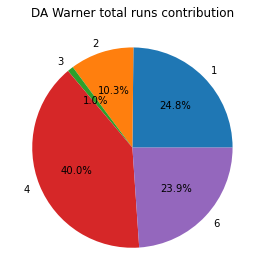

In [22]:
slices=[997,414,39,1604,960]
labels=[1,2,3,4,6]
plt.pie(slices,labels=labels,autopct='%1.1f%%')
plt.title("DA Warner total runs contribution")
plt.tight_layout()
plt.show()

In [23]:
# Runs in form of singles & Boundries

In [24]:
count(df_warner,1)+count(df_warner,2)+count(df_warner,3)

1450

In [25]:
count(df_warner,4)+count(df_warner,6)

2564

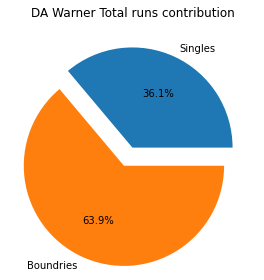

In [26]:
slices=[1450,2564]
labels=['Singles','Boundries']
explode =[0,0.2]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode)
plt.title("DA Warner Total runs contribution")
plt.tight_layout()
plt.show()

In [27]:
# score distribution  for team by innings

In [28]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [30]:
# using dictionary function  for creating alaises for team name

In [31]:
Teams={
    'Royal Challengers Bangalore':'RCB', 
    'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS',
    'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 
    'Gujarat Lions':'GL',
    'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD',
    'Chennai Super Kings':'CSK',
    'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC',
    'Kochi Tuskers Kerala':'KTK',
    'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'
}

In [32]:
df['batting_team']=df['batting_team'].map(Teams)
df['bowling_team']=df['bowling_team'].map(Teams)

In [33]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [34]:
df.groupby(['match_id','inning','batting_team'])[['total_runs']].sum()

total_runs
match_id inning batting_team            
1        1      SRH                  207
         2      RCB                  172
2        1      MI                   184
         2      RPS                  187
3        1      GL                   183
...                                  ...
634      2      KKR                  140
635      1      GL                   162
         2      SRH                  163
636      1      SRH                  208
         2      RCB                  200

[1284 rows x 1 columns]

In [35]:
runs=df.groupby(['match_id','inning','batting_team'])[['total_runs']].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)

In [211]:
runs.head(10)

,inning,batting_team,total_runs
0,1,Sunrisers Hyderabad,207
1,2,Royal Challengers Bangalore,172
2,1,Mumbai Indians,184
3,2,Rising Pune Supergiant,187
4,1,Gujarat Lions,183
5,2,Kolkata Knight Riders,184
6,1,Rising Pune Supergiant,163
7,2,Kings XI Punjab,164
8,1,Royal Challengers Bangalore,157
9,2,Delhi Daredevils,142


In [36]:
First_innings=runs[runs['inning']==1]
Second_innings=runs[runs['inning']==2]

In [37]:
First_innings.head()

,inning,batting_team,total_runs
0,1,SRH,207
2,1,MI,184
4,1,GL,183
6,1,RPS,163
8,1,RCB,157


In [38]:
Second_innings.head()

,inning,batting_team,total_runs
1,2,RCB,172
3,2,RPS,187
5,2,KKR,184
7,2,KXIP,164
9,2,DD,142


<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

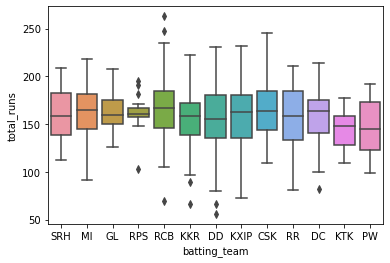

In [39]:
sns.boxplot(x='batting_team',y='total_runs',data=First_innings)

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

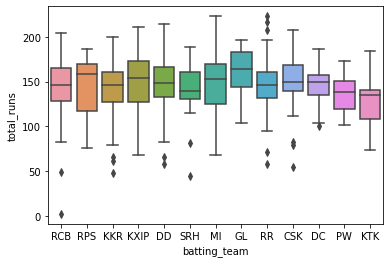

In [40]:
sns.boxplot(x='batting_team',y='total_runs',data=Second_innings)

In [41]:
# Top 10 scoring batsmen

In [42]:
Max_Runs=df.groupby(['batsman'])['batsman_runs'].sum()

In [43]:
Max_Runs

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Flintoff          62
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2591
Z Khan             117
Name: batsman_runs, Length: 461, dtype: int64

In [44]:
Max_Runs.sort_values(ascending=False)[0:10].reset_index()

,batsman,batsman_runs
0,SK Raina,4548
1,V Kohli,4423
2,RG Sharma,4207
3,G Gambhir,4132
4,DA Warner,4014
5,RV Uthappa,3778
6,CH Gayle,3651
7,S Dhawan,3561
8,MS Dhoni,3560
9,AB de Villiers,3486


<AxesSubplot:xlabel='batsman'>

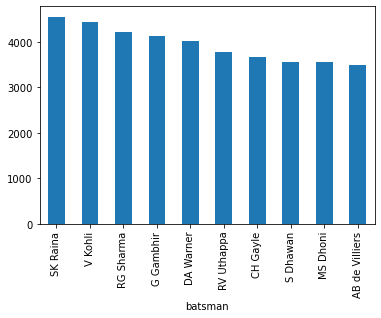

In [173]:
Max_Runs.sort_values(ascending=False)[0:10].plot.bar()

In [45]:
#Highest Wicket Taker

In [48]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [53]:
dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket']

In [55]:
hwt=df[df["dismissal_kind"].isin(dismissal_kinds)]
hwt.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


<AxesSubplot:>

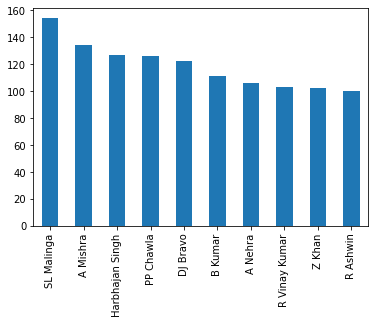

In [58]:
hwt['bowler'].value_counts()[0:10].plot.bar()